In [1]:
# Importing python packages 
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!
## need this for train test split 
from sklearn.model_selection import train_test_split

## need a modeling library (statsmodels) 
import statsmodels.api as sm
import statsmodels.tools

In [2]:
# Importing the data 
dataset = 'Life Expectancy Data.csv'
df = pd.read_csv(dataset)

In [3]:
pd.reset_option('display.max_columns')
df.head(2)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8


In [4]:
## We are going to make a list of all of our columns, and then remove price from that list - since we don't want to include the price in X
## seperate features from targets 
feature_cols = list(df.columns) ##select all columns 
feature_cols.remove('Life_expectancy') ## reomve price as this is the target 

In [5]:
feature_cols

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing']

In [6]:
X = df[feature_cols] ## dataframe holding all features 
y = df['Life_expectancy'] ##target looking to predict 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, ##features 
                                                    y, ##targets 
                                                    test_size = 0.2,## %allocated to the test
                                                    random_state = 84)## want the same train set each time 

In [8]:
all(X_train.index == y_train.index) ##check 

True

In [9]:
all(X_test.index == y_test.index) ##check 

True

In [10]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(X_train) #Display the table

,null,percent
Country,0,0.0
Region,0,0.0
Economy_status_Developed,0,0.0
Schooling,0,0.0
Thinness_five_nine_years,0,0.0
Thinness_ten_nineteen_years,0,0.0
Population_mln,0,0.0
GDP_per_capita,0,0.0
Incidents_HIV,0,0.0
Diphtheria,0,0.0


In [11]:
X_train.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
dtype: object

In [12]:
X_train['Economy_status_Developed'].unique()

array([0, 1], dtype=int64)

In [13]:
X_train['Economy_status_Developing'].unique()

array([1, 0], dtype=int64)

Q fir client -- is there another status ???? 

In [14]:
X_train[(X_train.Economy_status_Developed == 0) & (X_train.Economy_status_Developing == 0)] ##check if developing vs developed is mutually exclusive 

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing


In [15]:
unique_country = pd.DataFrame(X_train['Country'].unique())

In [16]:
unique_country

,0
0,Samoa
1,Malta
2,Latvia
3,Maldives
4,United Kingdom
...,...
174,Thailand
175,"Bahamas, The"
176,Nigeria
177,Cameroon


In [17]:
pd.set_option('display.max_rows', 180)

In [18]:
unique_country.sort_values(by=0,ascending=True)

,0
122,Afghanistan
9,Albania
145,Algeria
137,Angola
51,Antigua and Barbuda
100,Argentina
25,Armenia
82,Australia
116,Austria
109,Azerbaijan


In [19]:
X_train['Country'].str.lower().str.strip().nunique()

179

In [20]:
unique_region = pd.DataFrame(X_train['Region'].unique()).sort_values(by=0)

In [21]:
unique_region

,0
4,Africa
2,Asia
5,Central America and Caribbean
1,European Union
6,Middle East
8,North America
0,Oceania
3,Rest of Europe
7,South America


In [22]:
pd.reset_option('display.max_rows', 205)
pd.reset_option('display.max_columns', 205)

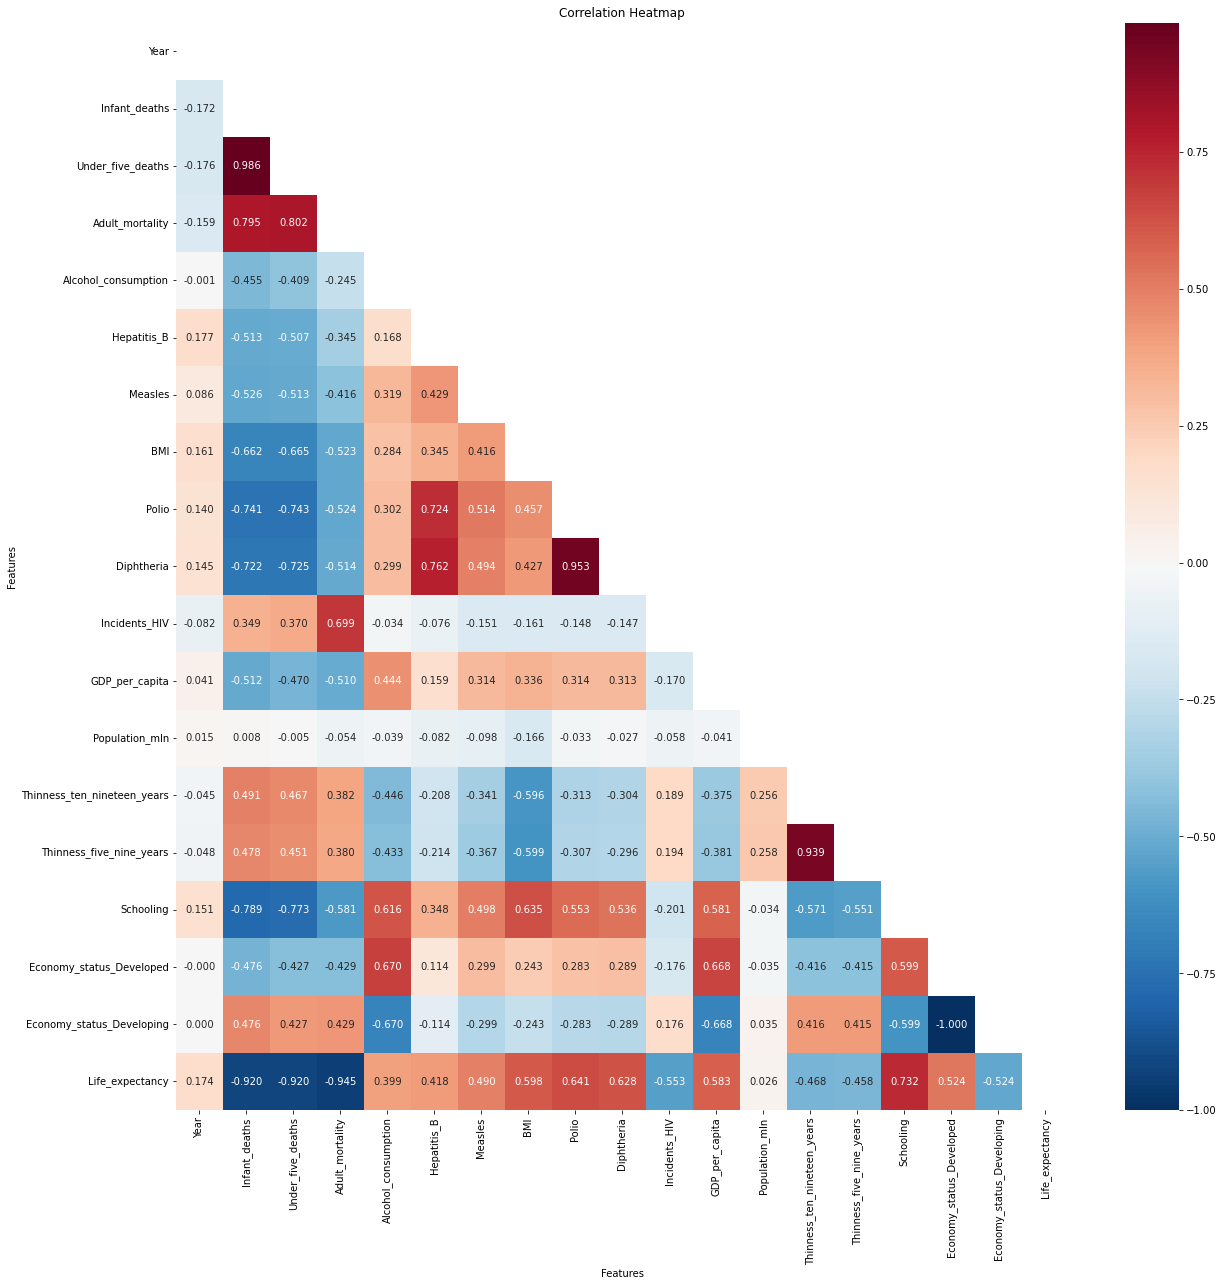

In [25]:
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(df.corr()))

# Add a title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [26]:
##looking at indopendant variabe correlations 

In [27]:
## remove develpoed vs developing 

In [28]:
## strong corr between infant mortality and death under 5 - remove infant 

In [29]:
## strong corr between thinness 10 -19 and 5-9 

In [30]:
## diphtheia polio and hep b all similar 

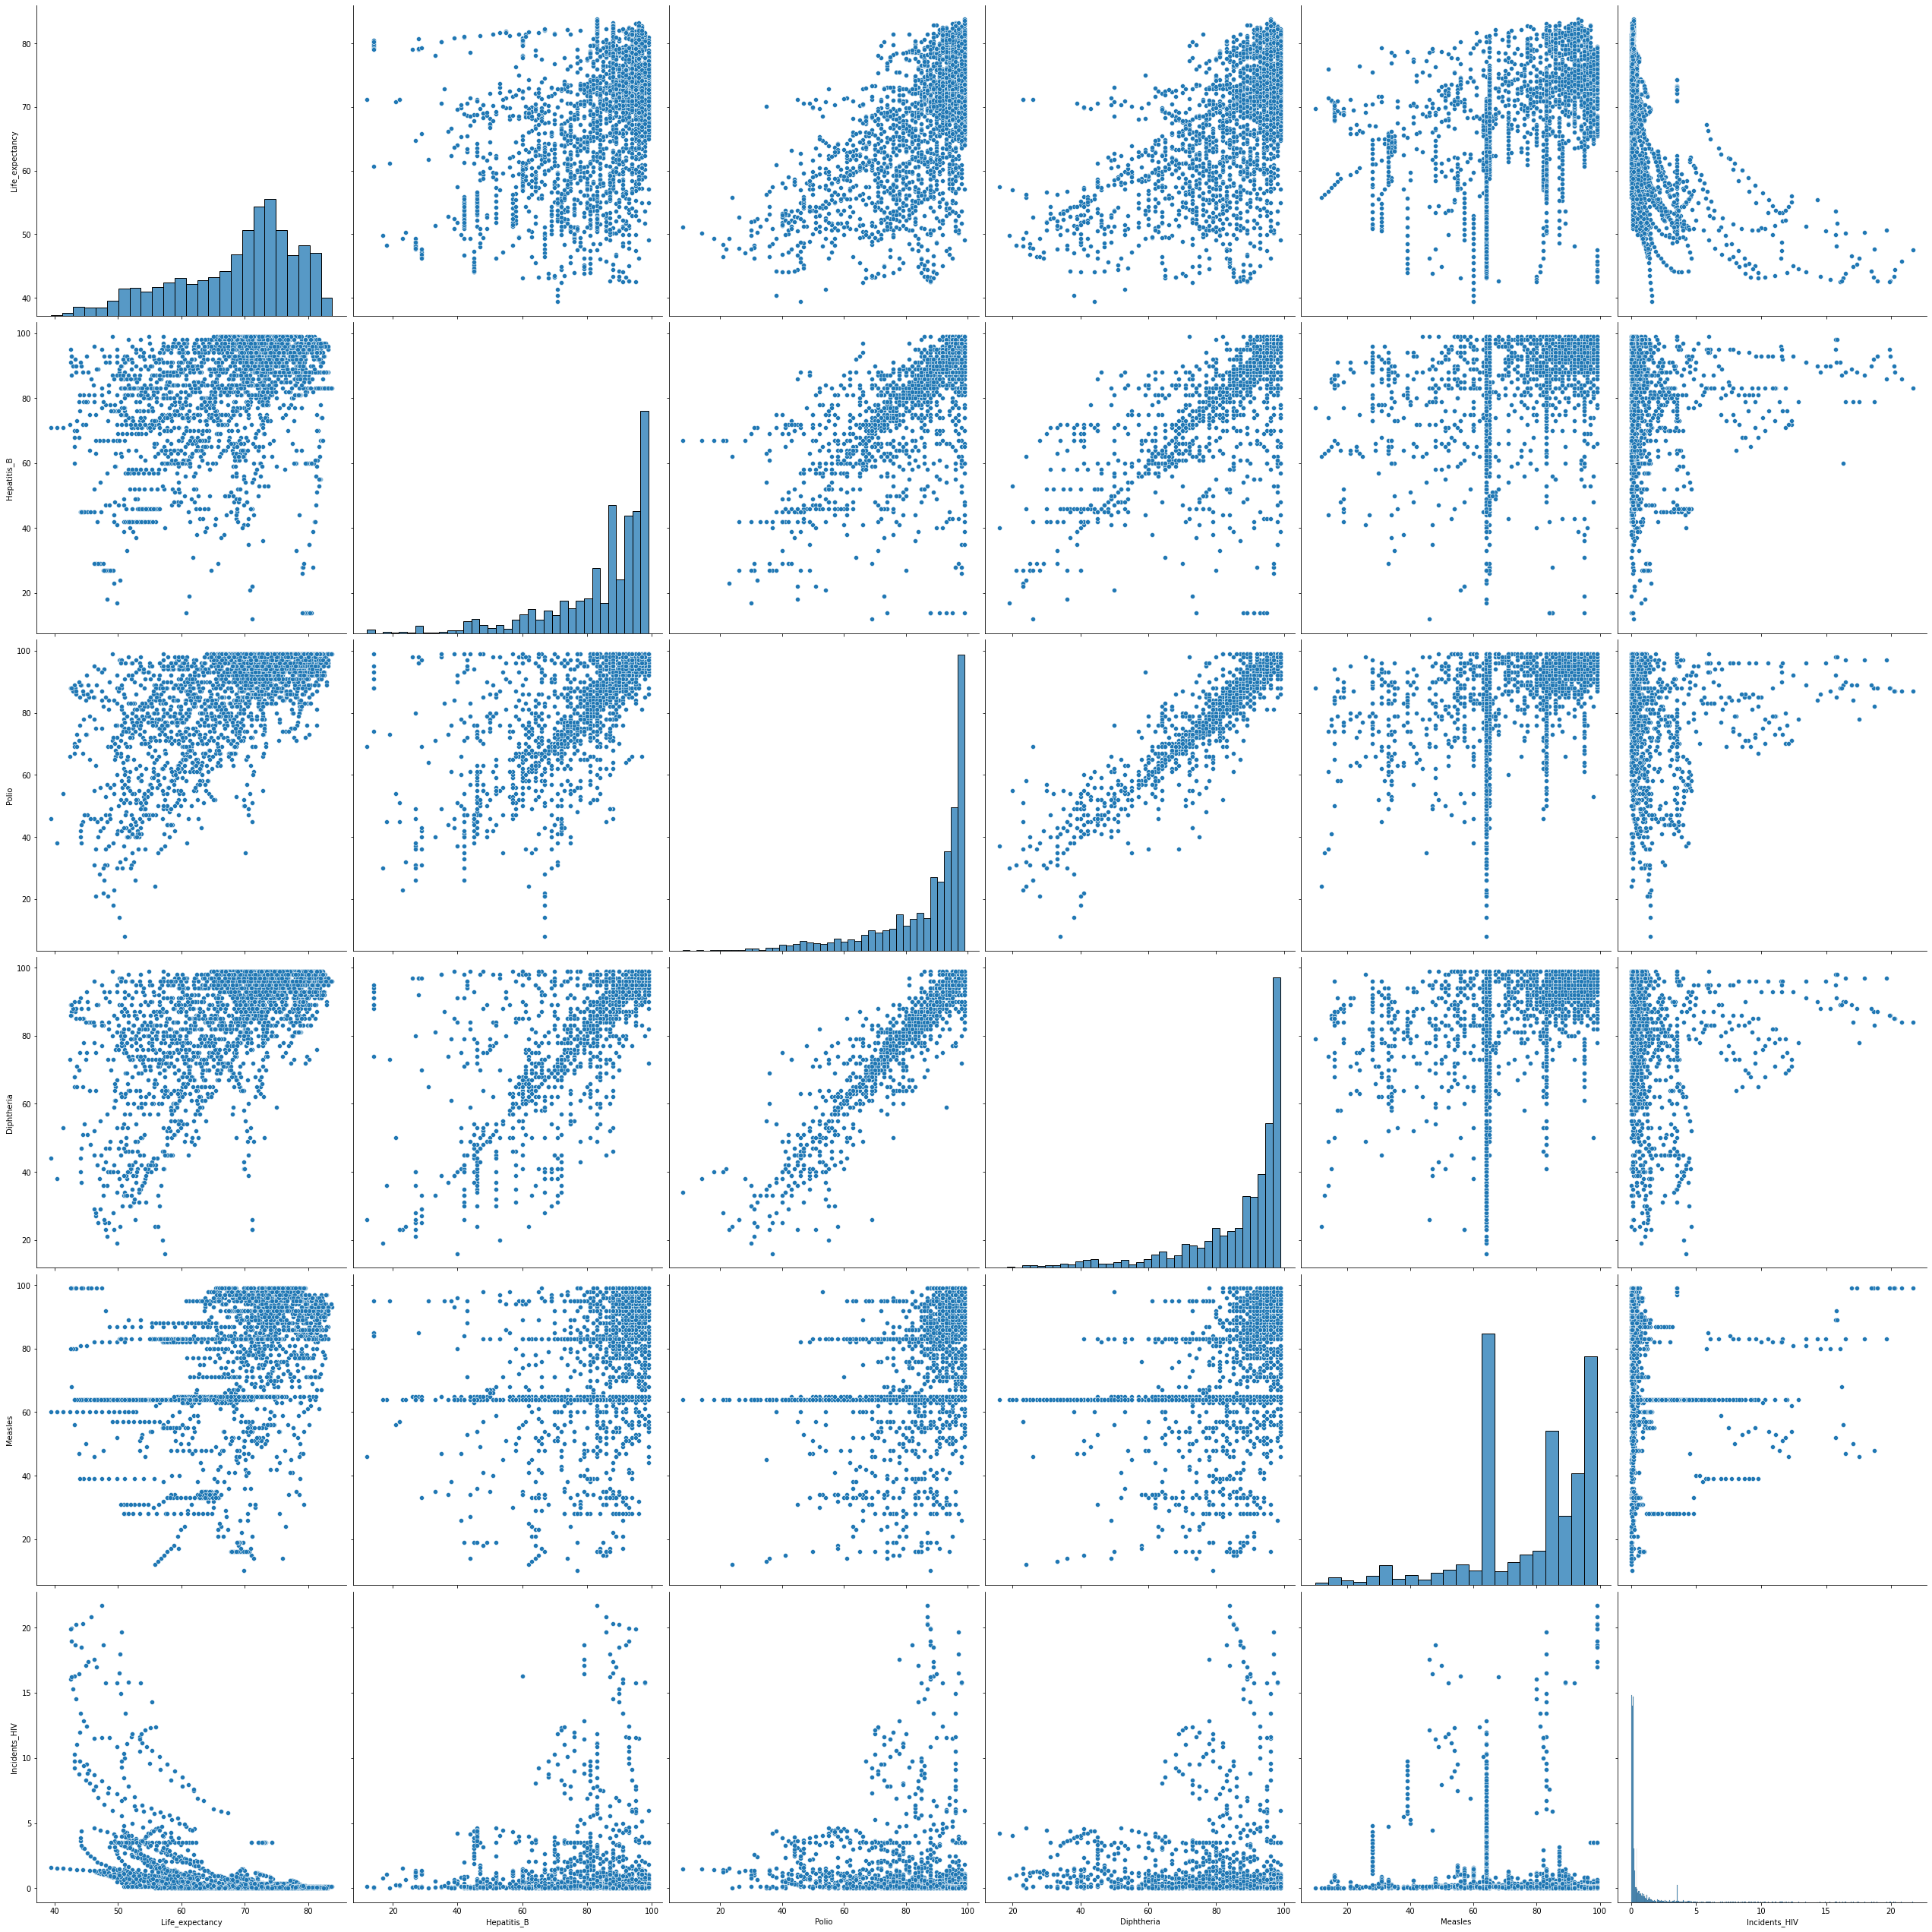

In [31]:
sns.pairplot(df[['Life_expectancy','Hepatitis_B','Polio','Diphtheria','Measles','Incidents_HIV']],
             height = 6)
plt.show()

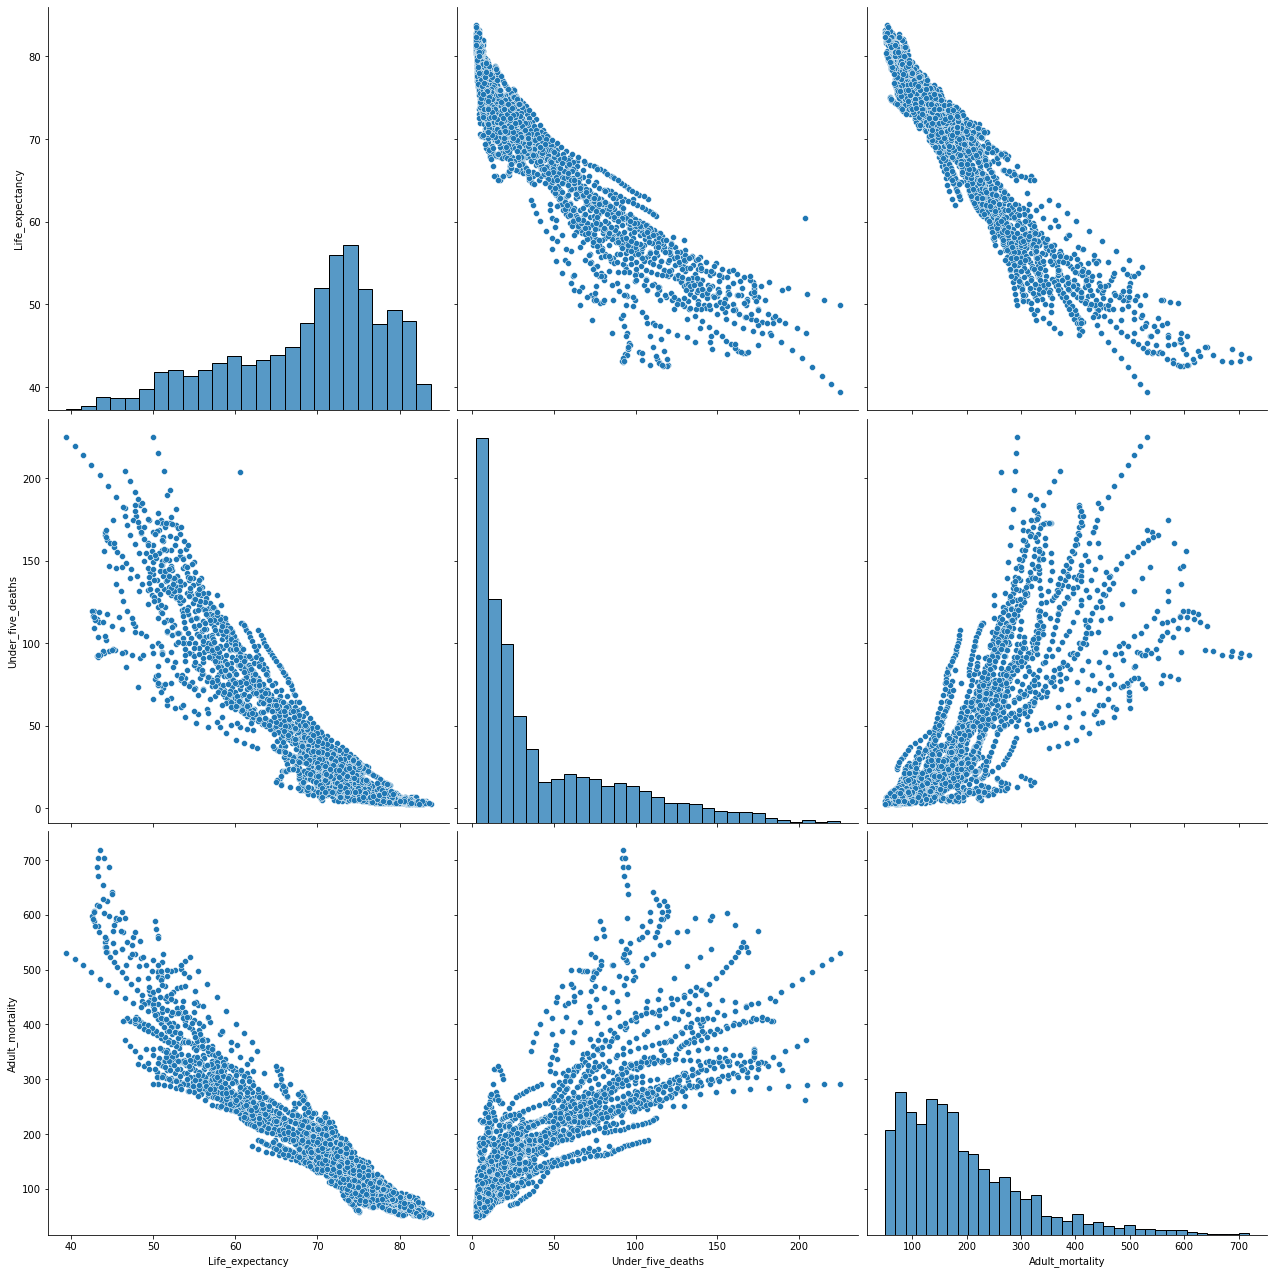

In [32]:
sns.pairplot(df[['Life_expectancy','Under_five_deaths','Adult_mortality']],
             height = 6)
plt.show()

In [33]:
X_train.drop(['Country', 'Region', 'Economy_status_Developed'], axis = 1, inplace = True)

In [34]:
X_test.drop(['Country', 'Region', 'Economy_status_Developed'], axis = 1, inplace = True)

In [35]:
X_test.shape

(573, 17)

In [36]:
def feature_eng(df):
        df = df.copy() #Create a local copy
        df = sm.add_constant(df) #Add a constating, as we are using statsmodels
        return df

In [37]:
X_train = feature_eng(X_train)
X_test = feature_eng(X_test)

C:\Users\kemia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


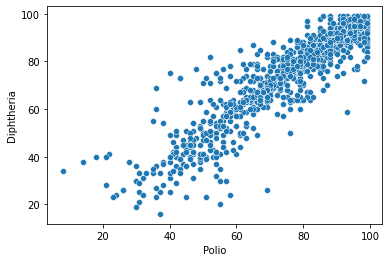

In [158]:
#df['GDP_ex'] = np.exp(df['GDP_per_capita'])
#df['GDP_log'] = np.log(df['GDP_per_capita'])
#X_train['GDP_log'] = np.log(X_train['GDP_per_capita'])
#X_test['GDP_log'] = np.log(X_test['GDP_per_capita'])
#X_train['BMI_log'] = np.log(X_train['BMI'])
#X_test['BMI_log'] = np.log(X_test['BMI'])
df['BMI_log'] = np.log(df['BMI'])

sns.scatterplot(data = df,
               x = df['Polio'],
               y = df['Diphtheria'])
plt.show()

In [159]:
df[['BMI_log', 'BMI', 'GDP_log', 'Year', 'Life_expectancy','Polio','Diphtheria']].corr()

,BMI_log,BMI,GDP_log,Year,Life_expectancy,Polio,Diphtheria
BMI_log,1.000000,0.998369,0.638198,0.160369,0.607814,0.468095,0.440811
BMI,0.998369,1.000000,0.624465,0.161422,0.598423,0.457206,0.426501
GDP_log,0.638198,0.624465,1.000000,0.081005,0.795556,0.508062,0.501789
Year,0.160369,0.161422,0.081005,1.000000,0.174359,0.139858,0.145143
Life_expectancy,0.607814,0.598423,0.795556,0.174359,1.000000,0.641217,0.627541
Polio,0.468095,0.457206,0.508062,0.139858,0.641217,1.000000,0.953178
Diphtheria,0.440811,0.426501,0.501789,0.145143,0.627541,0.953178,1.000000


In [151]:
print(X_train['GDP_log'].min())
print(X_train['GDP_log'].max())

4.997212273764115
11.629979345969065


In [60]:
X_train.columns

Index(['const', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developing',
       'GDP_log'],
      dtype='object')

In [148]:
X_train['Year'].unique

<bound method Series.unique of 233     2013
2427    2004
2711    2011
2061    2006
2365    2010
        ... 
2624    2011
206     2012
501     2003
857     2006
1962    2007
Name: Year, Length: 2291, dtype: int64>

In [155]:
feature_cols = ['const',
                #'Year', 
                #'Infant_deaths', 
                #'Under_five_deaths',
                'Adult_mortality', 
                #'Alcohol_consumption', 
                #'Hepatitis_B', 
                #'Measles',
                   #'BMI', 
                'Polio', 
                #'Diphtheria', 
                'Incidents_HIV', 
                #'GDP_per_capita',
                #'Population_mln', 
                #'Thinness_ten_nineteen_years',
                #'Thinness_five_nine_years', 
                #'Schooling', 
                #'Economy_status_Developing',
                 'GDP_log',
                #'BMI_log'
               ]

## Create and train an OLS linear regression
lin_reg = sm.OLS(y_train, X_train[feature_cols]) # Creating model
results = lin_reg.fit() # Fit model and store/save it
results.summary() # Print the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        13:33:23   Log-Likelihood:                -4897.7
No. Observations:                2291   AIC:                             9805.
Df Residuals:                    2286   BIC:                             9834.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.0753      0.608     98.747      0.000      58.882      61.268
Adult_mortality    -0.0605      0.001    -68.648      0.000      -0.062      -0.059
Polio               0.0899      0.004     25.300      0.000       0.083       0.097
Incidents_HIV       0.1229      0.031      4.004      0.000       0.063       0.183
GDP_log             1.4872      0.047     31.537      0.000       1.395       1.580
==============================================================================
Omnibus:                       86.063   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.348
Skew:                          -0.406   Prob(JB):                     1.80e-24
Kurtosis:                       3.697   Cond. No.                     3.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
y_pred = results.predict(X_train[feature_cols])

# Get the RMSE of the model: y_train (real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

2.0521291701843247


In [157]:
y_test_pred = results.predict(X_test[feature_cols])

# Get the RMSE of the model applied to the testing set
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse_test)

1.97019373431334


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [119]:
X_ViF = calculate_vif(X_train[feature_cols])

dropping 'const' at index: 0
dropping 'Polio' at index: 2
dropping 'Adult_mortality' at index: 1
Remaining variables:
Index(['Under_five_deaths', 'GDP_log'], dtype='object')
